In [ ]:
# -----
# 문제 정의
# ------
# 주어진 제품 및 매장(X값, 컬럼) 기반으로 판매금액(Item_Outlet_Sales)을 예측하기


In [1]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
# train = pd.read_csv("https://raw.githubusercontent.com/lovedlim/bigdata_analyst_cert/main/part2/ch4/train.csv")
# test = pd.read_csv("https://raw.githubusercontent.com/lovedlim/bigdata_analyst_cert/main/part2/ch4/test.csv")
train
test




,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDO38,17.250,Low Fat,0.073251,Canned,76.4986,OUT017,2007,NaN,Tier 2,Supermarket Type1
1,FDO32,6.360,Low Fat,0.120544,Fruits and Vegetables,45.8060,OUT046,1997,Small,Tier 1,Supermarket Type1
2,FDT14,10.695,Regular,0.128247,Dairy,121.8440,OUT018,2009,Medium,Tier 3,Supermarket Type2
3,FDG50,7.405,Low Fat,0.015296,Canned,89.7146,OUT049,1999,Medium,Tier 1,Supermarket Type1
4,FDR11,10.500,Regular,0.142760,Breads,159.3578,OUT049,1999,Medium,Tier 1,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...
1700,NCU18,NaN,Low Fat,0.097769,Household,142.4496,OUT019,1985,Small,Tier 1,Grocery Store
1701,FDY02,NaN,Regular,0.153457,Dairy,264.0910,OUT019,1985,Small,Tier 1,Grocery Store
1702,FDI09,20.750,Regular,0.129864,Seafood,240.1880,OUT018,2009,Medium,Tier 3,Supermarket Type2
1703,DRH23,14.650,Low Fat,0.171282,Hard Drinks,54.0614,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [ ]:
# -------------------
# EDA
# -------------------

In [9]:
train.shape, test.shape


((6818, 12), (1705, 11))

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6818 non-null   object 
 1   Item_Weight                5656 non-null   float64
 2   Item_Fat_Content           6818 non-null   object 
 3   Item_Visibility            6818 non-null   float64
 4   Item_Type                  6818 non-null   object 
 5   Item_MRP                   6818 non-null   float64
 6   Outlet_Identifier          6818 non-null   object 
 7   Outlet_Establishment_Year  6818 non-null   int64  
 8   Outlet_Size                4878 non-null   object 
 9   Outlet_Location_Type       6818 non-null   object 
 10  Outlet_Type                6818 non-null   object 
 11  Item_Outlet_Sales          6818 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 639.3+ KB


In [6]:
test.info()
# test에 Item_Outlet_Sales 컬럼이 없는 걸 보니
# y값을 Item_Outlet_Sales 으로 두면 될거같음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            1705 non-null   object 
 1   Item_Weight                1404 non-null   float64
 2   Item_Fat_Content           1705 non-null   object 
 3   Item_Visibility            1705 non-null   float64
 4   Item_Type                  1705 non-null   object 
 5   Item_MRP                   1705 non-null   float64
 6   Outlet_Identifier          1705 non-null   object 
 7   Outlet_Establishment_Year  1705 non-null   int64  
 8   Outlet_Size                1235 non-null   object 
 9   Outlet_Location_Type       1705 non-null   object 
 10  Outlet_Type                1705 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 146.7+ KB


In [11]:
train.head(5)
test.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDO38,17.250,Low Fat,0.073251,Canned,76.4986,OUT017,2007,NaN,Tier 2,Supermarket Type1
1,FDO32,6.360,Low Fat,0.120544,Fruits and Vegetables,45.8060,OUT046,1997,Small,Tier 1,Supermarket Type1
2,FDT14,10.695,Regular,0.128247,Dairy,121.8440,OUT018,2009,Medium,Tier 3,Supermarket Type2
3,FDG50,7.405,Low Fat,0.015296,Canned,89.7146,OUT049,1999,Medium,Tier 1,Supermarket Type1
4,FDR11,10.500,Regular,0.142760,Breads,159.3578,OUT049,1999,Medium,Tier 1,Supermarket Type1


In [8]:
train.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
6813,NCC54,17.750,Low Fat,0.097863,Health and Hygiene,239.3196,OUT049,1999,Medium,Tier 1,Supermarket Type1,3615.2940
6814,NCF19,13.000,Low Fat,0.035252,Household,48.0034,OUT018,2009,Medium,Tier 3,Supermarket Type2,923.4646
6815,FDU11,4.785,Low Fat,0.092576,Breads,121.0098,OUT035,2004,Small,Tier 2,Supermarket Type1,2530.7058
6816,FDK14,6.980,Low Fat,0.041189,Canned,82.8934,OUT045,2002,NaN,Tier 2,Supermarket Type1,818.9340
6817,NCD31,NaN,Low Fat,0.015360,Household,163.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,1973.4312


In [9]:
train.sample(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3059,NCS29,9.000,Low Fat,0.069532,Health and Hygiene,266.5884,OUT035,2004,Small,Tier 2,Supermarket Type1,6624.7100
5789,NCM42,6.130,Low Fat,0.028482,Household,110.4912,OUT017,2007,NaN,Tier 2,Supermarket Type1,1310.2944
2678,FDF17,5.190,Low Fat,0.042862,Frozen Foods,196.8110,OUT017,2007,NaN,Tier 2,Supermarket Type1,3731.8090
6300,FDF09,6.215,Low Fat,0.012147,Fruits and Vegetables,37.9848,OUT035,2004,Small,Tier 2,Supermarket Type1,782.9808
1349,FDX32,15.100,Regular,0.100014,Fruits and Vegetables,145.4786,OUT049,1999,Medium,Tier 1,Supermarket Type1,1589.2646
1610,FDZ09,17.600,Low Fat,0.175546,Snack Foods,163.6868,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
1649,FDD08,8.300,Low Fat,0.035554,Fruits and Vegetables,37.4506,OUT017,2007,NaN,Tier 2,Supermarket Type1,796.9626
3526,FDC35,NaN,Low Fat,0.122243,Starchy Foods,207.5638,OUT027,1985,Medium,Tier 3,Supermarket Type3,4555.4036
2289,FDF14,7.550,Low Fat,0.027165,Canned,152.3340,OUT035,2004,Small,Tier 2,Supermarket Type1,2603.2780
882,FDX16,17.850,Low Fat,0.000000,Frozen Foods,148.0050,OUT018,2009,Medium,Tier 3,Supermarket Type2,898.8300


In [10]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,5656.000000,6818.000000,6818.000000,6818.000000,6818.000000
mean,12.872703,0.066121,140.419533,1997.885890,2190.941459
std,4.651034,0.051383,62.067861,8.339795,1706.131256
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026914,93.610050,1987.000000,836.577700
50%,12.600000,0.053799,142.448300,1999.000000,1806.648300
75%,17.000000,0.095273,185.060150,2004.000000,3115.944000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [11]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,1404.000000,1705.000000,1705.000000,1705.000000
mean,12.796984,0.066174,143.285107,1997.615836
std,4.613957,0.052465,63.063146,8.497423
min,4.555000,0.000000,31.955800,1985.000000
25%,8.710000,0.027571,94.743600,1987.000000
50%,12.600000,0.054234,144.512800,1999.000000
75%,16.700000,0.092927,187.755600,2004.000000
max,21.350000,0.311090,266.888400,2009.000000


In [12]:
train.describe(include='O') # 최빈값 확인할 때 사용

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,6818,6818,6818,6818,4878,6818,6818
unique,1554,5,16,10,3,3,4
top,FDW26,Low Fat,Snack Foods,OUT046,Medium,Tier 3,Supermarket Type1
freq,9,4092,963,763,2228,2664,4474


In [13]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1162
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1940
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
test.isnull().sum()

Item_Identifier                0
Item_Weight                  301
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  470
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [12]:
train.isnull().sum().sum()
test.isnull().sum().sum()


771

In [ ]:
# -------------- 
# 데이터 전처리
# --------------

In [2]:
# y값(target) 분할
target = train.pop('Item_Outlet_Sales')
target

0        639.1680
1        990.7104
2       2799.6890
3       1176.4686
4       3418.8830
          ...    
6813    3615.2940
6814     923.4646
6815    2530.7058
6816     818.9340
6817    1973.4312
Name: Item_Outlet_Sales, Length: 6818, dtype: float64

In [3]:
# 결측값 채우기(무게 : 최소값, 사이즈 : 최빈값)
train.describe()

#Item_Weight의 최소값(min)
train['Item_Weight']= train['Item_Weight'].fillna(train['Item_Weight'].min())
train.isnull().sum()
#Outlet_Size의 결측값은 최빈값(mode)
train['Outlet_Size']= train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
train.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6818 non-null   object 
 1   Item_Weight                6818 non-null   float64
 2   Item_Fat_Content           6818 non-null   object 
 3   Item_Visibility            6818 non-null   float64
 4   Item_Type                  6818 non-null   object 
 5   Item_MRP                   6818 non-null   float64
 6   Outlet_Identifier          6818 non-null   object 
 7   Outlet_Establishment_Year  6818 non-null   int64  
 8   Outlet_Size                6818 non-null   object 
 9   Outlet_Location_Type       6818 non-null   object 
 10  Outlet_Type                6818 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 586.1+ KB


In [23]:
# 결측값 채우기(무게 : 최소값, 사이즈 : 최빈값)
test.describe()

#Item_Weight의 최소값(min)
test['Item_Weight']= test['Item_Weight'].fillna(test['Item_Weight'].min())
test.isnull().sum()
#Outlet_Size의 결측값은 최빈값(mode)
test['Outlet_Size']= test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            1705 non-null   object 
 1   Item_Weight                1705 non-null   float64
 2   Item_Fat_Content           1705 non-null   object 
 3   Item_Visibility            1705 non-null   float64
 4   Item_Type                  1705 non-null   object 
 5   Item_MRP                   1705 non-null   float64
 6   Outlet_Identifier          1705 non-null   object 
 7   Outlet_Establishment_Year  1705 non-null   int64  
 8   Outlet_Size                1705 non-null   object 
 9   Outlet_Location_Type       1705 non-null   object 
 10  Outlet_Type                1705 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 146.7+ KB


In [24]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,6818.000000,6818.000000,6818.000000,6818.000000
mean,11.455107,0.066121,140.419533,1997.885890
std,5.265718,0.051383,62.067861,8.339795
min,4.555000,0.000000,31.290000,1985.000000
25%,6.690000,0.026914,93.610050,1987.000000
50%,11.000000,0.053799,142.448300,1999.000000
75%,16.100000,0.095273,185.060150,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


In [ ]:
# 이상치는 생략하겠습니다.

In [5]:
# Label-Encoding/One-hot-Encodeing
from sklearn.preprocessing import LabelEncoder

cols = train.columns[train.dtypes == object]

for col in cols:
    le = LabelEncoder()
    le.fit(pd.concat([train[col],test[col]], axis=0)) # 행 합치기
    train[col] = le.transform(train[col])
    test[col] = le.transform(test[col])

# Item_Fat_Content 같이 object였던 것들이 수치형(숫자형)으로 변화합니다.
train
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,717,17.250,1,0.073251,3,76.4986,2,2007,3,1,1
1,712,6.360,1,0.120544,6,45.8060,8,1997,2,0,1
2,928,10.695,2,0.128247,4,121.8440,3,2009,1,2,2
3,423,7.405,1,0.015296,3,89.7146,9,1999,1,0,1
4,828,10.500,2,0.142760,1,159.3578,9,1999,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1700,1502,NaN,1,0.097769,9,142.4496,4,1985,2,0,0
1701,1168,NaN,2,0.153457,4,264.0910,4,1985,2,0,0
1702,474,20.750,2,0.129864,12,240.1880,3,2009,1,2,2
1703,69,14.650,1,0.171282,7,54.0614,2,2007,3,1,1


In [6]:
# 컬럼제거(id 같은경우가 X값으로 존재하게 되면 예측성능이 떨어짐) 
train.drop('Item_Identifier',axis=1, inplace=True) # Id의 axis를 drop하겠다.
test.drop('Item_Identifier',axis=1, inplace=True) # Id의 axis를 drop하겠다.
train
test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,17.250,1,0.073251,3,76.4986,2,2007,3,1,1
1,6.360,1,0.120544,6,45.8060,8,1997,2,0,1
2,10.695,2,0.128247,4,121.8440,3,2009,1,2,2
3,7.405,1,0.015296,3,89.7146,9,1999,1,0,1
4,10.500,2,0.142760,1,159.3578,9,1999,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1700,NaN,1,0.097769,9,142.4496,4,1985,2,0,0
1701,NaN,2,0.153457,4,264.0910,4,1985,2,0,0
1702,20.750,2,0.129864,12,240.1880,3,2009,1,2,2
1703,14.650,1,0.171282,7,54.0614,2,2007,3,1,1


In [ ]:
# -------------------
# 검증데이터 분할 train -validation 데이터를 8:2 비율로 나누는 것이 일반적
# -------------------

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(

    train,
    target,
    test_size = 0.2,
    random_state =0 # 난수값
)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((5454, 10), (1364, 10), (5454,), (1364,))

In [ ]:
# --------------------------
# 학습 및 평가(MSE, MAE, R2..)
# ---------------------------

In [8]:
# 모델학습
from sklearn.linear_model import LinearRegression # 선형회귀

lr = LinearRegression()
lr.fit(X_train ,y_train) #학습
y_pred = lr.predict(X_val) #예측
y_pred


array([3006.53001011, 1386.35244112, 1610.9644381 , ..., 2265.01933974,
       4071.18108208, 3489.44301098])

In [10]:
# 평가
from sklearn.metrics import mean_squared_error  # MSE
from sklearn.metrics import mean_absolute_error  # MAE
from sklearn.metrics import r2_score  # R2

# MSE
lr_mse = mean_squared_error(y_val, y_pred)

# MAE
lr_mae = mean_absolute_error(y_val, y_pred)

# RMSE -> squared=False 옵션으로 바로 가능!
lr_rmse = mean_squared_error(y_val, y_pred, squared=False)

# R2
lr_r2 = r2_score(y_val, y_pred)

print("MSE: ", lr_mse)  
print("MAE: ", lr_mae)
print("RMSE:", lr_rmse)
print("R2:  ", lr_r2)

#MSE/ MAE/ RMSE 상대적인 기준
# 평균적으로 Y 평균값의 10% 이하 : 준수한 성능
# 평균적으로 Y 평균값의 10 - 30% : 보통
# Y 평균값의 30% 이상 : 낮은 성능
# 시험점수(0-100) 예측 -> RMSE = 10 - 문제
# 아파트 가격(30평 - 평균 5억) 예측 -> RMSE=1000만원(오차 2%) -> 오차 작음(괜찮은 모델)

#R2 결졍계수
# 0.7 이상 : 좋은 모델
# 0.5 -0.7 : 보통
# 0.3 -0.5 : 낮은 모델

MSE:  1258220.3398377183
MAE:  858.9613052108202
RMSE: 1121.7042122759985
R2:   0.5153323554636462


In [12]:
# Lightgbm
!pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 21.6 MB/s eta 0:00:0000:0100:01


MSE : 1174239.27
MAE : 755.97
RMSE: 1083.62
R2  : 0.5477


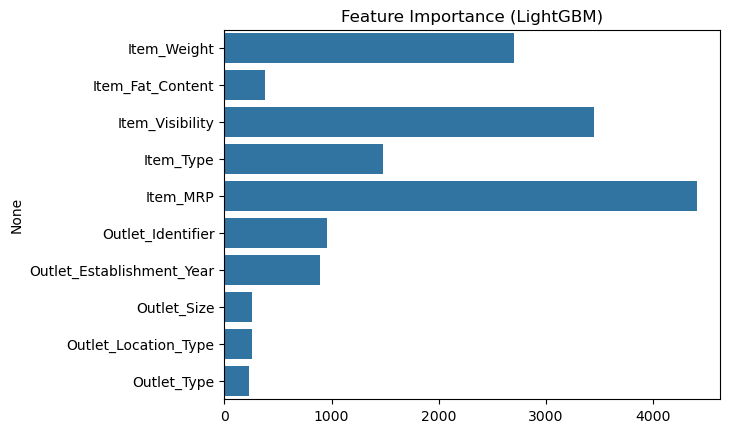

In [15]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. 모델 정의
lgbm = LGBMRegressor(
    n_estimators=500,      # 트리 개수
    learning_rate=0.05,    # 학습률
    max_depth=-1,          # 트리 깊이 제한 없음
    num_leaves=31,         # 리프 노드 수 (복잡도 조절)
    subsample=0.8,         # 학습 데이터 샘플링 비율
    colsample_bytree=0.8,  # 특성 샘플링 비율
    random_state=42
)

# 2. 모델 학습
lgbm.fit(X_train, y_train)

# 3. 예측
y_pred = lgbm.predict(X_val)

# 4. 성능 평가
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MSE : {mse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2  : {r2:.4f}")

# 5. 변수 중요도 확인
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=lgbm.feature_importances_, y=X_train.columns)
plt.title("Feature Importance (LightGBM)")
plt.show()


In [16]:
import lightgbm as lgb
model = lgb.LGBMRegressor(random_state=0, verbose=-1)
model.fit(X_train, y_train)
y_pred_lgb = model.predict(X_val)
y_pred_lgb

array([2983.84439509, 1212.23600204, 2302.55390985, ..., 2006.27151483,
       4741.85000463, 4010.89935397])

In [14]:
lgb_mse= mean_squared_error(y_val, y_pred_lgb)
# MAE
lgb_mae = mean_absolute_error(y_val, y_pred_lgb)
# RMSE -> squared=False 옵션으로 바로 가능!
lgb_rmse = mean_squared_error(y_val, y_pred_lgb, squared=False)
# R2
lgb_r2 = r2_score(y_val, y_pred_lgb)

print("MSE: ", lgb_mse)  
print("MAE: ", lgb_mae)
print("RMSE:", lgb_rmse)
print("R2:  ", lgb_r2)

MSE:  1111526.442702285
MAE:  732.8448115843846
RMSE: 1054.289544054329
R2:   0.571838981005607


In [46]:
#-------------------------
# 파일로 저장
# ------------------------
pred = model.predict(test)
submit = pd.DataFrame({'pred':pred})
submit.to_csv("result.csv", index=False)